# Эксперименты с кластеризацией площади квартир

На двух домах с несколькими методами. Для воспроизведения методики не нужны, но оставил их здесь, чтобы можно было посмотреть.

In [9]:
from collections import Counter

import pandas as pd
from sklearn.cluster import AgglomerativeClustering, KMeans, MeanShift

pd.set_option("display.max_columns", None)

In [4]:
houses = pd.read_csv("export-reestrmkd-77-20240701.zip", sep=";", decimal=",")
ppf_by_mo = pd.read_csv("ppf_by_mo.csv")

In [7]:
houses.loc[houses["id"] == 7553721]

,id,region_id,area_id,city_id,street_id,shortname_region,formalname_region,shortname_area,formalname_area,shortname_city,formalname_city,shortname_street,formalname_street,house_number,building,block,letter,address,houseguid,management_organization_id,built_year,exploitation_start_year,project_type,house_type,is_alarm,method_of_forming_overhaul_fund,floor_count_max,floor_count_min,entrance_count,elevators_count,energy_efficiency,quarters_count,living_quarters_count,unliving_quarters_count,area_total,area_residential,area_non_residential,area_common_property,area_land,parking_square,playground,sportsground,other_beautification,foundation_type,floor_type,wall_material,basement_area,chute_type,chute_count,electrical_type,electrical_entries_count,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type
18678,7553721,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,bd016634-0ea9-49aa-8d09-ec960ee3058f,г,Москва,NaN,NaN,NaN,NaN,ул,Наметкина,11,NaN,NaN,NaN,"г. Москва, ул. Наметкина, д. 11",4b3ac544-fa8d-4ef6-8a2b-5241ac7b9d33,8929992.0,1996.0,1996.0,П-44,Многоквартирный дом,Нет,На счете регионального оператора,17.0,17.0,2.0,4.0,Не присвоен,130,128.0,2.0,9427.6,7032.9,2394.7,1275.8,0.0,0.0,500,500,Нет,Ленточный,Железобетонные,Железобетон,634.5,На лестничной клетке,2.0,Центральное,2.0,Центральное,Закрытая с приготовлением горячей воды на ЦТП,Центральное,Центральное,0.0,Отсутствует,Приточно-вытяжная вентиляция,Автоматическая,Внутренние водостоки


In [3]:
cher_11 = pd.read_csv("cher_11.csv", header=None)

In [4]:
cher_11.iloc[:, 0]

0      72.6
1      38.0
2      50.6
3      58.5
4      72.7
       ... 
123    56.4
124    38.1
125    50.5
126    56.3
127    37.9
Name: 0, Length: 128, dtype: float64

In [46]:
KMeans(n_clusters=3).fit(cher_11.iloc[:, [0]]).labels_

array([1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2], dtype=int32)

In [47]:
Counter(KMeans(n_clusters=3).fit(cher_11.iloc[:, [0]]).labels_)

Counter({2: 32, 1: 32, 0: 64})

In [49]:
ppf_by_mo.loc[ppf_by_mo["mun_obr"] == "Черёмушки"]

,mun_obr,ppf,n_flats,sheet_name
17,Черёмушки,2.834779,-1,Черемушки
19,Черёмушки,2.020848,1,Черемушки
20,Черёмушки,2.76394,2,Черемушки
21,Черёмушки,3.762614,3,Черемушки
22,Черёмушки,5.198526,4,Черемушки


In [50]:
2.020848 * 32 + 2.76394 * 64 + 3.762614 * 32

361.962944

In [52]:
(2.020848 * 32 + 2.76394 * 64 + 3.762614 * 32) / 128

2.8278355

In [53]:
(361-289) / 2.8278355

25.46116985942075

In [27]:
agc = AgglomerativeClustering(n_clusters=None, distance_threshold=5, linkage="average")
agc.fit(cher_11.iloc[:, [0]])

AgglomerativeClustering(distance_threshold=5, linkage='average',
                        n_clusters=None)

In [28]:
agc.n_clusters_

4

In [29]:
agc.labels_

array([0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 1, 0, 3, 1, 0, 3, 1, 0, 3, 1, 0, 3, 1, 0, 3, 1, 0, 3, 1, 0,
       3, 1, 0, 3, 1, 0, 3, 1, 0, 3, 1, 0, 3, 1, 0, 3, 1, 0, 3, 1, 0, 3,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 2, 3, 1,
       2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2,
       3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2])

In [33]:
mc = MeanShift()
mc.fit(cher_11.iloc[:, [0]])
Counter(mc.labels_)

Counter({1: 32, 2: 32, 0: 64})

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

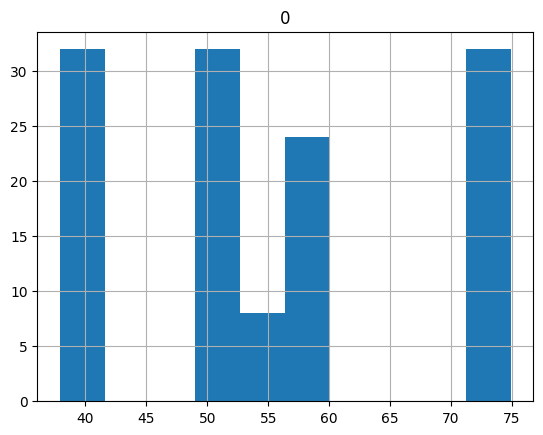

In [16]:
cher_11.iloc[:, [0]].hist()

In [8]:
houses.loc[houses["id"] == 8038815]

,id,region_id,area_id,city_id,street_id,shortname_region,formalname_region,shortname_area,formalname_area,shortname_city,formalname_city,shortname_street,formalname_street,house_number,building,block,letter,address,houseguid,management_organization_id,built_year,exploitation_start_year,project_type,house_type,is_alarm,method_of_forming_overhaul_fund,floor_count_max,floor_count_min,entrance_count,elevators_count,energy_efficiency,quarters_count,living_quarters_count,unliving_quarters_count,area_total,area_residential,area_non_residential,area_common_property,area_land,parking_square,playground,sportsground,other_beautification,foundation_type,floor_type,wall_material,basement_area,chute_type,chute_count,electrical_type,electrical_entries_count,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type
530,8038815,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,d1df4d35-7aff-49d8-8d66-bd20f3ddb7b5,г,Москва,NaN,NaN,NaN,NaN,ул,Азовская,23,NaN,NaN,NaN,"г. Москва, ул. Азовская, д. 23",b11b1a36-887c-4609-b2e2-40591f8f1427,7553366.0,1968.0,1968.0,индивидуальный проект,Многоквартирный дом,Нет,На счете регионального оператора,16.0,16.0,1.0,2.0,C,110,107.0,3.0,6177.5,5887.5,290.0,949.0,0.0,0.0,500,500,Гостевая парковка,Бетонные столбы,Железобетонные,Железобетон,527.9,На лестничной клетке,1.0,Центральное,1.0,Центральное,Открытая с отбором сетевой воды на горячее вод...,Центральное,Центральное,0.0,Центральное,Приточно-вытяжная вентиляция,Пожарные гидранты,Внутренние водостоки


In [35]:
azov_23 = pd.read_csv("azov_23.csv", header=None, decimal=",")
azov_23.iloc[:, 0]

0      54.2
1      71.0
2      54.3
3      71.2
4      53.4
       ... 
102    53.0
103    40.5
104    40.6
105    71.2
106    53.5
Name: 0, Length: 107, dtype: float64

<AxesSubplot: >

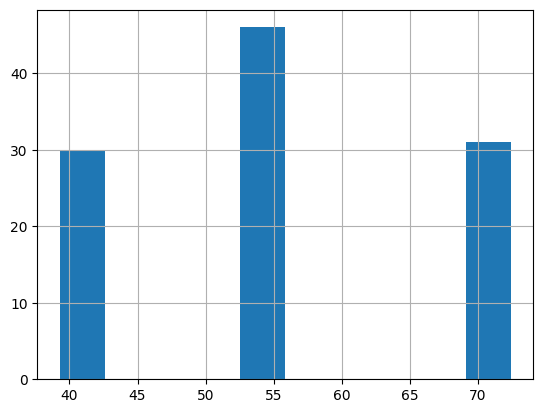

In [64]:
azov_23.iloc[:, 0].hist()

In [61]:
KMeans(n_clusters=3).fit(azov_23.iloc[:, [0]]).labels_

array([2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1,
       2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 2,
       1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1,
       2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2],
      dtype=int32)

In [62]:
Counter(KMeans(n_clusters=3).fit(azov_23.iloc[:, [0]]).labels_)

Counter({0: 46, 1: 31, 2: 30})

In [63]:
ppf_by_mo.loc[ppf_by_mo["mun_obr"] == "Зюзино"]

,mun_obr,ppf,n_flats,sheet_name
17,Зюзино,2.75772,-1,Зюзино
19,Зюзино,1.924238,1,Зюзино
20,Зюзино,2.735714,2,Зюзино
21,Зюзино,3.670233,3,Зюзино
22,Зюзино,4.276904,4,Зюзино


In [68]:
(3.670233 * 46 + 2.735714 * 30 + 4.276904 * 31)

383.486162

In [69]:
(3.670233 * 46 + 2.735714 * 30 + 4.276904 * 31) / 107

3.583982822429906

In [67]:
houses.loc[houses["id"] == 8038815]

,id,region_id,area_id,city_id,street_id,shortname_region,formalname_region,shortname_area,formalname_area,shortname_city,formalname_city,shortname_street,formalname_street,house_number,building,block,letter,address,houseguid,management_organization_id,built_year,exploitation_start_year,project_type,house_type,is_alarm,method_of_forming_overhaul_fund,floor_count_max,floor_count_min,entrance_count,elevators_count,energy_efficiency,quarters_count,living_quarters_count,unliving_quarters_count,area_total,area_residential,area_non_residential,area_common_property,area_land,parking_square,playground,sportsground,other_beautification,foundation_type,floor_type,wall_material,basement_area,chute_type,chute_count,electrical_type,electrical_entries_count,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type
530,8038815,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,d1df4d35-7aff-49d8-8d66-bd20f3ddb7b5,г,Москва,NaN,NaN,NaN,NaN,ул,Азовская,23,NaN,NaN,NaN,"г. Москва, ул. Азовская, д. 23",b11b1a36-887c-4609-b2e2-40591f8f1427,7553366.0,1968.0,1968.0,индивидуальный проект,Многоквартирный дом,Нет,На счете регионального оператора,16.0,16.0,1.0,2.0,C,110,107.0,3.0,6177.5,5887.5,290.0,949.0,0.0,0.0,500,500,Гостевая парковка,Бетонные столбы,Железобетонные,Железобетон,527.9,На лестничной клетке,1.0,Центральное,1.0,Центральное,Открытая с отбором сетевой воды на горячее вод...,Центральное,Центральное,0.0,Центральное,Приточно-вытяжная вентиляция,Пожарные гидранты,Внутренние водостоки


In [71]:
((3.670233 * 46 + 2.735714 * 30 + 4.276904 * 31) - 342) / 3.583982822429906

11.575435501633558

In [36]:
mc = MeanShift()
mc.fit(azov_23.iloc[:, [0]])
Counter(mc.labels_)

Counter({0: 46, 1: 31, 2: 30})